NAME: SHAW, OLUWAGBOUNMI PRECIOUS 
<br> Student ID: st20182956 
<br> PROGRAM: Msc. DATA SCIENCE (INTERNSHIP)
<br> COURSE: GEOSPATIAL ANALYSIS 


## TASK 2.1

In [1]:
#Import all the libraries needed
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
from opencage.geocoder import OpenCageGeocode
import sys
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#import libraries for visualization 
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import seaborn as sns 

## Load and Visualize the Data 

In [2]:
#Load the data 
world_pop = pd.read_csv('world_population.csv') 
world_urban_pop = pd.read_csv('world_urban_population.csv')

In [3]:
#Visualize the data
world_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [4]:
world_urban_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,43819.0,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0,NaN
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,NaN
2,Angola,AGO,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,...,14660282.0,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0,NaN
3,Albania,ALB,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,...,1546929.0,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,NaN
4,Andorra,AND,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,...,74305.0,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0,NaN


## Data cleaning and exploration

In [5]:
#select the required columns for Task 1 and 2 
loc = world_pop.columns.get_loc
world_pop = world_pop.iloc[:, np.r_[loc('Country Name'), loc('1990'):loc('2010')+1]]

world_pop.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0


Renamed the column headers in the dataframe to differenciate between the world population and urban world population.

In [6]:
headers = {'1990': '1990 World Population', '1991': '1991 World Population', '1992': '1992 World Population',
           '1993': '1993 World Population', '1994': '1994 World Population', '1995': '1995 World Population',
           '1996': '1996 World Population', '1997': '1997 World Population', '1998': '1998 World Population',
           '1999': '1999 World Population', '2000': '2000 World Population', '2001': '2001 World Population',
           '2002': '2002 World Population', '2003': '2003 World Population', '2004': '2004 World Population',
           '2005': '2005 World Population', '2006': '2006 World Population', '2007': '2007 World Population',
           '2008': '2008 World Population', '2009': '2009 World Population', '2010': '2010 World Population',
          }

world_pop.rename(columns=headers, inplace=True)
world_pop.head()

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2001 World Population,2002 World Population,2003 World Population,2004 World Population,2005 World Population,2006 World Population,2007 World Population,2008 World Population,2009 World Population,2010 World Population
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0


Carry out the same operations on the Urban World Population dataframe



In [7]:
#select the required columns for Task 1 and 2
loc = world_urban_pop.columns.get_loc
world_urban_pop = world_urban_pop.iloc[:, np.r_[loc('Country Name'), loc('1990'):loc('2010')+1]]
world_urban_pop.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,31273.0,32507.0,34116.0,35953.0,37719.0,39172.0,40232.0,40970.0,41488.0,...,43048.0,43670.0,44246.0,44669.0,44889.0,44882.0,44686.0,44378.0,44053.0,43778.0
1,Afghanistan,2628554.0,2828169.0,3093388.0,3391712.0,3677087.0,3916248.0,4093835.0,4220821.0,4321584.0,...,4790053.0,5031157.0,5293385.0,5563504.0,5824291.0,6055019.0,6263747.0,6464835.0,6680732.0,6927764.0
2,Angola,4400964.0,4725626.0,5067883.0,5427584.0,5806611.0,6159458.0,6530150.0,6918998.0,7328066.0,...,8688765.0,9190861.0,9721267.0,10284528.0,10882817.0,11437890.0,12025601.0,12644649.0,13291081.0,13963065.0
3,Albania,1197222.0,1198912.0,1209490.0,1219882.0,1230218.0,1240399.0,1250518.0,1260414.0,1270214.0,...,1298584.0,1327220.0,1354848.0,1381828.0,1407298.0,1430886.0,1452398.0,1473392.0,1495260.0,1519519.0
4,Andorra,51627.0,53571.0,55546.0,57380.0,58847.0,59803.0,60128.0,59940.0,59605.0,...,61991.0,64194.0,66747.0,69192.0,71205.0,72737.0,73843.0,74641.0,75098.0,75007.0


In [8]:
#rename the column headers 
headers = {'1990': '1990 Urban World Population', '1991': '1991 Urban World Population', '1992': '1992 Urban World Population',
           '1993': '1993 Urban World Population', '1994': '1994 Urban World Population', '1995': '1995 Urban World Population',
           '1996': '1996 Urban World Population', '1997': '1997 Urban World Population', '1998': '1998 Urban World Population',
           '1999': '1999 Urban World Population', '2000': '2000 Urban World Population', '2001': '2001 Urban World Population',
           '2002': '2002 Urban World Population', '2003': '2003 Urban World Population', '2004': '2004 Urban World Population',
           '2005': '2005 Urban World Population', '2006': '2006 Urban World Population', '2007': '2007 Urban World Population',
           '2008': '2008 Urban World Population', '2009': '2009 Urban World Population', '2010': '2010 Urban World Population',
          }

world_urban_pop.rename(columns=headers, inplace=True)
world_urban_pop.head()

,Country Name,1990 Urban World Population,1991 Urban World Population,1992 Urban World Population,1993 Urban World Population,1994 Urban World Population,1995 Urban World Population,1996 Urban World Population,1997 Urban World Population,1998 Urban World Population,...,2001 Urban World Population,2002 Urban World Population,2003 Urban World Population,2004 Urban World Population,2005 Urban World Population,2006 Urban World Population,2007 Urban World Population,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population
0,Aruba,31273.0,32507.0,34116.0,35953.0,37719.0,39172.0,40232.0,40970.0,41488.0,...,43048.0,43670.0,44246.0,44669.0,44889.0,44882.0,44686.0,44378.0,44053.0,43778.0
1,Afghanistan,2628554.0,2828169.0,3093388.0,3391712.0,3677087.0,3916248.0,4093835.0,4220821.0,4321584.0,...,4790053.0,5031157.0,5293385.0,5563504.0,5824291.0,6055019.0,6263747.0,6464835.0,6680732.0,6927764.0
2,Angola,4400964.0,4725626.0,5067883.0,5427584.0,5806611.0,6159458.0,6530150.0,6918998.0,7328066.0,...,8688765.0,9190861.0,9721267.0,10284528.0,10882817.0,11437890.0,12025601.0,12644649.0,13291081.0,13963065.0
3,Albania,1197222.0,1198912.0,1209490.0,1219882.0,1230218.0,1240399.0,1250518.0,1260414.0,1270214.0,...,1298584.0,1327220.0,1354848.0,1381828.0,1407298.0,1430886.0,1452398.0,1473392.0,1495260.0,1519519.0
4,Andorra,51627.0,53571.0,55546.0,57380.0,58847.0,59803.0,60128.0,59940.0,59605.0,...,61991.0,64194.0,66747.0,69192.0,71205.0,72737.0,73843.0,74641.0,75098.0,75007.0


Combine the world_pop and world_urban_pop dataframes

In [9]:
populations = world_pop.merge(world_urban_pop, on='Country Name')
populations.head()

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2001 Urban World Population,2002 Urban World Population,2003 Urban World Population,2004 Urban World Population,2005 Urban World Population,2006 Urban World Population,2007 Urban World Population,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,43048.0,43670.0,44246.0,44669.0,44889.0,44882.0,44686.0,44378.0,44053.0,43778.0
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,4790053.0,5031157.0,5293385.0,5563504.0,5824291.0,6055019.0,6263747.0,6464835.0,6680732.0,6927764.0
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,8688765.0,9190861.0,9721267.0,10284528.0,10882817.0,11437890.0,12025601.0,12644649.0,13291081.0,13963065.0
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,1298584.0,1327220.0,1354848.0,1381828.0,1407298.0,1430886.0,1452398.0,1473392.0,1495260.0,1519519.0
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,61991.0,64194.0,66747.0,69192.0,71205.0,72737.0,73843.0,74641.0,75098.0,75007.0


In [10]:
#Visualize null values 
populations['1990 World Population'].isnull() | populations['2010 Urban World Population'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
259     True
260    False
261    False
262    False
263    False
Length: 264, dtype: bool

From the output above, it is difiicult to visualize the columns which may be true for null values.
<br> So, we drop null values from the columns as a whole as seen below

In [11]:
populations.dropna()

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2001 Urban World Population,2002 Urban World Population,2003 Urban World Population,2004 Urban World Population,2005 Urban World Population,2006 Urban World Population,2007 Urban World Population,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,43048.0,43670.0,44246.0,44669.0,44889.0,44882.0,44686.0,44378.0,44053.0,43778.0
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,4790053.0,5031157.0,5293385.0,5563504.0,5824291.0,6055019.0,6263747.0,6464835.0,6680732.0,6927764.0
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,8688765.0,9190861.0,9721267.0,10284528.0,10882817.0,11437890.0,12025601.0,12644649.0,13291081.0,13963065.0
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,1298584.0,1327220.0,1354848.0,1381828.0,1407298.0,1430886.0,1452398.0,1473392.0,1495260.0,1519519.0
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,61991.0,64194.0,66747.0,69192.0,71205.0,72737.0,73843.0,74641.0,75098.0,75007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,162803.0,163997.0,165490.0,167119.0,168694.0,170054.0,171165.0,172068.0,172839.0,...,38706.0,38705.0,38510.0,38320.0,38134.0,37950.0,37775.0,37613.0,37465.0,37335.0
260,"Yemen, Rep.",11709993.0,12302124.0,12954155.0,13634076.0,14297613.0,14913315.0,15469274.0,15975668.0,16450310.0,...,4799795.0,5037894.0,5287133.0,5547434.0,5818280.0,6100787.0,6395609.0,6703156.0,7023785.0,7357687.0
261,South Africa,36800509.0,37718950.0,38672607.0,39633750.0,40564059.0,41435758.0,42241011.0,42987461.0,43682260.0,...,26143328.0,26720456.0,27305501.0,27898739.0,28506195.0,29131012.0,29774433.0,30442138.0,31137754.0,31866171.0
262,Zambia,8036845.0,8246656.0,8451347.0,8656486.0,8869740.0,9096607.0,9339733.0,9597609.0,9866476.0,...,3742481.0,3892210.0,4046912.0,4207899.0,4376259.0,4552286.0,4736246.0,4930109.0,5135535.0,5354635.0


## Geocoding

In [12]:
geolocator = Nominatim(user_agent="geoShaw")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

 #create location column
populations['location'] = populations['Country Name'].apply(geocode)

In [13]:
#create longitude, latitude, and altitude from location column 
populations['points'] = populations['location'].apply(lambda loc: tuple(loc.point) if loc else None)

#split point column into latitude, longitude and altitude columns
populations[['lat', 'lng', ['alt']]] = pd.DataFrame(populations['points'].tolist(), index=populations.index)

C:\Users\Admin\anaconda3\envs\geo_env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [14]:
#delete the location and altitude columns 
populations = populations.drop(['location', 'alt'], axis =1 )
populations.head()

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2004 Urban World Population,2005 Urban World Population,2006 Urban World Population,2007 Urban World Population,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,44669.0,44889.0,44882.0,44686.0,44378.0,44053.0,43778.0,"(12.4902998, -69.9609842, 0.0)",12.490300,-69.960984
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,5563504.0,5824291.0,6055019.0,6263747.0,6464835.0,6680732.0,6927764.0,"(33.7680065, 66.2385139, 0.0)",33.768006,66.238514
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,10284528.0,10882817.0,11437890.0,12025601.0,12644649.0,13291081.0,13963065.0,"(-11.8775768, 17.5691241, 0.0)",-11.877577,17.569124
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,1381828.0,1407298.0,1430886.0,1452398.0,1473392.0,1495260.0,1519519.0,"(41.000028, 19.9999619, 0.0)",41.000028,19.999962
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,69192.0,71205.0,72737.0,73843.0,74641.0,75098.0,75007.0,"(42.5407167, 1.5732033, 0.0)",42.540717,1.573203


In [15]:
#check foe null values because two new columns were generated 
populations.isnull()

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2004 Urban World Population,2005 Urban World Population,2006 Urban World Population,2007 Urban World Population,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
260,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
261,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Deleting the NULL values
populations = populations.dropna(subset = ['lat'])
populations = populations.dropna(subset = ['lng'])
populations.shape
# Visualize the NULL observations
populations[populations['lat'].isnull()]
populations[populations['lng'].isnull()]


,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2004 Urban World Population,2005 Urban World Population,2006 Urban World Population,2007 Urban World Population,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng


## To calculate the World Urban per Capita, the formula is given as: 

### Urban World Population / World population 

In [17]:
#calculate the world urban per capita denoted in the notebook as 'WUP_per_cap' for 1990, 2000 and 2010
populations['WUP_per_cap_1990'] = populations['1990 Urban World Population']/populations['1990 World Population']
populations['WUP_per_cap_2000'] = populations['2000 Urban World Population']/populations['2000 World Population']
populations['WUP_per_cap_2010'] = populations['2010 Urban World Population']/populations['2010 World Population']

In [18]:
#convert to from dataframe to geodataframe
gdf_populations = gpd.GeoDataFrame(
    populations, 
    geometry=gpd.points_from_xy(populations.lng, populations.lat)
)
gdf_populations.head()

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng,WUP_per_cap_1990,WUP_per_cap_2000,WUP_per_cap_2010,geometry
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,44378.0,44053.0,43778.0,"(12.4902998, -69.9609842, 0.0)",12.490300,-69.960984,0.503194,0.467172,0.430593,POINT (-69.96098 12.49030)
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,6464835.0,6680732.0,6927764.0,"(33.7680065, 66.2385139, 0.0)",33.768006,66.238514,0.211770,0.220780,0.237370,POINT (66.23851 33.76801)
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,12644649.0,13291081.0,13963065.0,"(-11.8775768, 17.5691241, 0.0)",-11.877577,17.569124,0.371440,0.500870,0.597830,POINT (17.56912 -11.87758)
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,1473392.0,1495260.0,1519519.0,"(41.000028, 19.9999619, 0.0)",41.000028,19.999962,0.364280,0.417410,0.521630,POINT (19.99996 41.00003)
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,74641.0,75098.0,75007.0,"(42.5407167, 1.5732033, 0.0)",42.540717,1.573203,0.947128,0.923949,0.888193,POINT (1.57320 42.54072)


Plot the world urban population per capita for 1990 and hover over the map to view thw WUP per capita for each country.

In [19]:
 data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gdf_populations['Country Name'],
        locationmode = "country names",
        z = gdf_populations['WUP_per_cap_1990'],
        text = gdf_populations['Country Name'],
        colorbar = {'title' : 'World Urban Population per Capita'},
      )

layout = dict(title = 'World Urban Population per Capita, 1990',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Plot the world urban population per capita for 2000 and hover over the map to view thw WUP per capita for each country.

In [20]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gdf_populations['Country Name'],
        locationmode = "country names",
        z = gdf_populations['WUP_per_cap_2000'],
        text = gdf_populations['Country Name'],
        colorbar = {'title' : 'World Urban Population per Capita'},
      )

layout = dict(title = 'World Urban Population per Capita, 2000',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Plot the world urban population per capita for 2010 and hover over the map to view thw WUP per capita for each country.

In [21]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gdf_populations['Country Name'],
        locationmode = "country names",
        z = gdf_populations['WUP_per_cap_2010'],
        text = gdf_populations['Country Name'],
        colorbar = {'title' : 'World Urban Population per Capita'},
      )

layout = dict(title = 'World Urban Population per Capita, 2010',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# TASK 2.2 

> For year 2010, plot the urban population per capita for only the countries having 
population greater than 290000000. 

In [22]:
#save the countries with population greater than 290000000 to a dataframe
gdf1 = gdf_populations[gdf_populations["2010 World Population"] > 290000000]

In [23]:
#visulaize the dataframe
gdf1

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng,WUP_per_cap_1990,WUP_per_cap_2000,WUP_per_cap_2010,geometry
5,Arab World,2.226534e+08,2.287317e+08,2.329564e+08,2.392433e+08,2.454494e+08,2.531073e+08,2.590010e+08,2.648222e+08,2.705758e+08,...,1.880773e+08,1.941462e+08,2.003031e+08,"(30.84165265, 29.670019315230654, 0.0)",30.841653,29.670019,0.503952,0.529893,0.564409,POINT (29.67002 30.84165)
38,China,1.135185e+09,1.150780e+09,1.164970e+09,1.178440e+09,1.191835e+09,1.204855e+09,1.217550e+09,1.230075e+09,1.241935e+09,...,6.164812e+08,6.374073e+08,6.584987e+08,"(35.000074, 104.999927, 0.0)",35.000074,104.999927,0.264420,0.358770,0.492260,POINT (104.99993 35.00007)
61,East Asia & Pacific,1.822193e+09,1.848222e+09,1.872481e+09,1.895898e+09,1.919360e+09,1.942431e+09,1.965147e+09,1.987316e+09,2.008705e+09,...,1.086071e+09,1.116141e+09,1.146374e+09,"(34.8528895, -82.3573713, 0.0)",34.852890,-82.357371,0.339576,0.414208,0.519453,POINT (-82.35737 34.85289)
63,Europe & Central Asia,8.415204e+08,8.453981e+08,8.488779e+08,8.519238e+08,8.540320e+08,8.554907e+08,8.568569e+08,8.581647e+08,8.592978e+08,...,6.186692e+08,6.229916e+08,6.271380e+08,"(16.853218, 96.117122, 0.0)",16.853218,96.117122,0.674567,0.686059,0.706295,POINT (96.11712 16.85322)
66,Euro area,3.112626e+08,3.127081e+08,3.141621e+08,3.154491e+08,3.163668e+08,3.171814e+08,3.180030e+08,3.187618e+08,3.194340e+08,...,2.501149e+08,2.516913e+08,2.530605e+08,"(38.6811851, -9.1546646, 0.0)",38.681185,-9.154665,0.712200,0.729422,0.752817,POINT (-9.15466 38.68119)
71,European Union,4.204780e+08,4.217305e+08,4.229639e+08,4.243411e+08,4.253991e+08,4.262033e+08,4.268969e+08,4.275381e+08,4.281099e+08,...,3.191527e+08,3.208268e+08,3.221965e+08,"(42.6788082, 23.3216264, 0.0)",42.678808,23.321626,0.693689,0.708257,0.729723,POINT (23.32163 42.67881)
93,High income,1.028439e+09,1.036688e+09,1.042742e+09,1.050718e+09,1.058315e+09,1.067202e+09,1.074337e+09,1.081272e+09,1.088082e+09,...,9.175934e+08,9.274879e+08,9.366784e+08,"(35.9239085, -79.9803402, 0.0)",35.923909,-79.980340,0.737523,0.761523,0.794247,POINT (-79.98034 35.92391)
102,IDA total,8.333640e+08,8.562907e+08,8.797743e+08,9.036457e+08,9.277926e+08,9.522224e+08,9.769370e+08,1.001908e+09,1.026987e+09,...,4.211431e+08,4.373727e+08,4.541739e+08,"(30.4181709, -9.5965706, 0.0)",30.418171,-9.596571,0.255007,0.289078,0.332644,POINT (-9.59657 30.41817)
103,IDA blend,2.784966e+08,2.861425e+08,2.938749e+08,3.016798e+08,3.095681e+08,3.176161e+08,3.259087e+08,3.343992e+08,3.429810e+08,...,1.631992e+08,1.692951e+08,1.757576e+08,"(51.0494836, 3.7298482, 0.0)",51.049484,3.729848,0.301859,0.338644,0.385392,POINT (3.72985 51.04948)
105,IDA only,5.548674e+08,5.701482e+08,5.858993e+08,6.019659e+08,6.182245e+08,6.346063e+08,6.510284e+08,6.675084e+08,6.840062e+08,...,2.579439e+08,2.680776e+08,2.784162e+08,"(51.0661369, 3.7087344, 0.0)",51.066137,3.708734,0.231491,0.264214,0.306188,POINT (3.70873 51.06614)


Plot World Urban Population per Capita with Population > 29000000000, 2010 and hover over the countries. 

In [24]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gdf1['Country Name'],
        locationmode = "country names",
        z = gdf1['WUP_per_cap_2010'],
        text = gdf1['Country Name'],
        colorbar = {'title' : 'World Urban Population per Capita'},
      )

layout = dict(title = 'World Urban Population per Capita with Population > 29000000000, 2010',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

From the above plot, we can see only the countries with population more than 290000000 are displayed. 

> For year 2010, plot the urban population per capita for only the countries having 
population less than 69000000.

In [25]:
#save the countries with population less than 69000000 to a dataframe
gdf2 = gdf_populations[gdf_populations["2010 World Population"] < 69000000]
gdf2

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng,WUP_per_cap_1990,WUP_per_cap_2000,WUP_per_cap_2010,geometry
0,Aruba,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,...,44378.0,44053.0,43778.0,"(12.4902998, -69.9609842, 0.0)",12.490300,-69.960984,0.503194,0.467172,0.430593,POINT (-69.96098 12.49030)
1,Afghanistan,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,...,6464835.0,6680732.0,6927764.0,"(33.7680065, 66.2385139, 0.0)",33.768006,66.238514,0.211770,0.220780,0.237370,POINT (66.23851 33.76801)
2,Angola,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,...,12644649.0,13291081.0,13963065.0,"(-11.8775768, 17.5691241, 0.0)",-11.877577,17.569124,0.371440,0.500870,0.597830,POINT (17.56912 -11.87758)
3,Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,...,1473392.0,1495260.0,1519519.0,"(41.000028, 19.9999619, 0.0)",41.000028,19.999962,0.364280,0.417410,0.521630,POINT (19.99996 41.00003)
4,Andorra,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,...,74641.0,75098.0,75007.0,"(42.5407167, 1.5732033, 0.0)",42.540717,1.573203,0.947128,0.923949,0.888193,POINT (1.57320 42.54072)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,162803.0,163997.0,165490.0,167119.0,168694.0,170054.0,171165.0,172068.0,172839.0,...,37613.0,37465.0,37335.0,"(-13.7693895, -172.1200508, 0.0)",-13.769390,-172.120051,0.211999,0.219771,0.200781,POINT (-172.12005 -13.76939)
259,Kosovo,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,...,NaN,NaN,NaN,"(42.5869578, 20.9021231, 0.0)",42.586958,20.902123,NaN,NaN,NaN,POINT (20.90212 42.58696)
261,South Africa,36800509.0,37718950.0,38672607.0,39633750.0,40564059.0,41435758.0,42241011.0,42987461.0,43682260.0,...,30442138.0,31137754.0,31866171.0,"(-28.8166236, 24.991639, 0.0)",-28.816624,24.991639,0.520370,0.568910,0.622180,POINT (24.99164 -28.81662)
262,Zambia,8036845.0,8246656.0,8451347.0,8656486.0,8869740.0,9096607.0,9339733.0,9597609.0,9866476.0,...,4930109.0,5135535.0,5354635.0,"(-14.5189121, 27.5589884, 0.0)",-14.518912,27.558988,0.394070,0.348020,0.393550,POINT (27.55899 -14.51891)


Plot World Urban Population per Capita with Population < 69000000, 2010 and hover over the countries. 

In [26]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gdf2['Country Name'],
        locationmode = "country names",
        z = gdf2['WUP_per_cap_2010'],
        text = gdf2['Country Name'],
        colorbar = {'title' : 'World Urban Population per Capita'},
      )

layout = dict(title = 'World Urban Population per Capita with Population < 69000000, 2010',
              geo = dict(projection = {'type':'mercator'})
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

The plot above only shows the WUP per capita of the countries with population less than 69000000

>For year 2010, plot the urban population per capita for only the countries having 
urban population between 110146163 and 223096279. 

In [27]:
#save the countries with population between 110146163 and 223096279 to a dataframe
gdf3 = gdf_populations[(gdf_populations["2010 Urban World Population"] > 110146163) & 
                       (gdf_populations["2010 Urban World Population"] < 223096279)]
gdf3

,Country Name,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,...,2008 Urban World Population,2009 Urban World Population,2010 Urban World Population,points,lat,lng,WUP_per_cap_1990,WUP_per_cap_2000,WUP_per_cap_2010,geometry
5,Arab World,222653373.0,228731685.0,232956352.0,239243261.0,245449409.0,253107289.0,259000953.0,264822188.0,270575803.0,...,188077348.0,194146230.0,200303061.0,"(30.84165265, 29.670019315230654, 0.0)",30.841653,29.670019,0.503952,0.529893,0.564409,POINT (29.67002 30.84165)
27,Brazil,149003223.0,151648011.0,154259380.0,156849078.0,159432716.0,162019896.0,164614688.0,167209040.0,169785250.0,...,160823508.0,162949977.0,165055094.0,"(-10.3333333, -53.2, 0.0)",-10.333333,-53.200000,0.739220,0.811920,0.843350,POINT (-53.20000 -10.33333)
103,IDA blend,278496626.0,286142505.0,293874927.0,301679813.0,309568081.0,317616103.0,325908651.0,334399200.0,342980958.0,...,163199201.0,169295147.0,175757644.0,"(51.0494836, 3.7298482, 0.0)",51.049484,3.729848,0.301859,0.338644,0.385392,POINT (3.72985 51.04948)
104,Indonesia,181413402.0,184591903.0,187739786.0,190851175.0,193917462.0,196934260.0,199901228.0,202826446.0,205724592.0,...,113814309.0,117243827.0,120709130.0,"(-2.4833826, 117.8902853, 0.0)",-2.483383,117.890285,0.305840,0.420020,0.499140,POINT (117.89029 -2.48338)
117,Japan,123537000.0,123921000.0,124229000.0,124536000.0,124961000.0,125439000.0,125757000.0,126057000.0,126400000.0,...,114107975.0,115228215.0,116302928.0,"(36.5748441, 139.2394179, 0.0)",36.574844,139.239418,0.773390,0.786490,0.908120,POINT (139.23942 36.57484)
134,Low income,303390406.0,312235599.0,321531045.0,331155718.0,340941571.0,350774281.0,360601917.0,370477990.0,380522587.0,...,149192526.0,155157909.0,161184765.0,"(31.3458901, 27.222160782361907, 0.0)",31.345890,27.222161,0.247012,0.274537,0.303401,POINT (27.22216 31.34589)


Plot World Urban Population per Capita with Population between 110146163 and 223096279, 2010 and hover over the countries.

In [28]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = gdf3['Country Name'],
        locationmode = "country names",
        z = gdf3['WUP_per_cap_2010'],
        text = gdf3['Country Name'],
        colorbar = {'title' : 'World Urban Population per Capita'},
      )

layout = dict(title = 'World Urban Population per Capita with Urban Population between 110146163 and 223096279, 2010',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

The plot above only shows the WUP per capita of the 6 countries with population between 110146163 and 223096279

In [29]:
#gdf_populations = gdf_populations.drop(labels = 257, axis =0 )


>What is the percentage change in the urban population per capita from 1990 to 
2010, for the country having the highest population in 2010?

In [30]:
#find the country with the highest population in 2010
column = gdf_populations["2010 World Population"]
max_value = column.max()
max_value

6921871614.0

In [31]:
#find the index of the column 
max_index = column.idxmax()
max_index

257

In [32]:
#using the index of the column, locate the country 
x = gdf_populations.loc[257, ['Country Name', '2010 World Population', 'WUP_per_cap_1990', 'WUP_per_cap_2010']]
x

Country Name                    World
2010 World Population    6921871614.0
WUP_per_cap_1990             0.430134
WUP_per_cap_2010             0.516327
Name: 257, dtype: object

In [33]:
#calculate the percentage change in urban population per capita frm 1990 to 2010
percent_change = ((x.WUP_per_cap_2010 - x.WUP_per_cap_1990)/x.WUP_per_cap_1990) * 100
percent_change

20.038834417808285

>Plot the mean per capita world urban population (from 1990 to 2010) of all the 
countries.

In [34]:
#create a dataframe
df = pd.DataFrame()

In [35]:
#add the required columns to the dataframe 
df['Country Name'] = gdf_populations['Country Name']
df['WUP_per_cap_1990'] = gdf_populations['1990 Urban World Population']/gdf_populations['1990 World Population']
df['WUP_per_cap_1991'] = gdf_populations['1991 Urban World Population']/gdf_populations['1991 World Population']
df['WUP_per_cap_1992'] = gdf_populations['1992 Urban World Population']/gdf_populations['1992 World Population']
df['WUP_per_cap_1993'] = gdf_populations['1993 Urban World Population']/gdf_populations['1993 World Population']
df['WUP_per_cap_1994'] = gdf_populations['1994 Urban World Population']/gdf_populations['1994 World Population']
df['WUP_per_cap_1995'] = gdf_populations['1995 Urban World Population']/gdf_populations['1995 World Population']
df['WUP_per_cap_1996'] = gdf_populations['1996 Urban World Population']/gdf_populations['1996 World Population']
df['WUP_per_cap_1997'] = gdf_populations['1997 Urban World Population']/gdf_populations['1997 World Population']
df['WUP_per_cap_1998'] = gdf_populations['1998 Urban World Population']/gdf_populations['1998 World Population']
df['WUP_per_cap_1999'] = gdf_populations['1999 Urban World Population']/gdf_populations['1999 World Population']
df['WUP_per_cap_2000'] = gdf_populations['2000 Urban World Population']/gdf_populations['2000 World Population']
df['WUP_per_cap_2001'] = gdf_populations['2001 Urban World Population']/gdf_populations['2001 World Population']
df['WUP_per_cap_2002'] = gdf_populations['2002 Urban World Population']/gdf_populations['2002 World Population']
df['WUP_per_cap_2003'] = gdf_populations['2003 Urban World Population']/gdf_populations['2003 World Population']
df['WUP_per_cap_2004'] = gdf_populations['2004 Urban World Population']/gdf_populations['2004 World Population']
df['WUP_per_cap_2005'] = gdf_populations['2005 Urban World Population']/gdf_populations['2005 World Population']
df['WUP_per_cap_2006'] = gdf_populations['2006 Urban World Population']/gdf_populations['2006 World Population']
df['WUP_per_cap_2007'] = gdf_populations['2007 Urban World Population']/gdf_populations['2007 World Population']
df['WUP_per_cap_2008'] = gdf_populations['2008 Urban World Population']/gdf_populations['2008 World Population']
df['WUP_per_cap_2009'] = gdf_populations['2009 Urban World Population']/gdf_populations['2009 World Population']
df['WUP_per_cap_2010'] = gdf_populations['2010 Urban World Population']/gdf_populations['2010 World Population']

df['lat'] = gdf_populations['lat']
df['lng'] = gdf_populations['lng']

In [36]:
#visulaize the dataframe
df

,Country Name,WUP_per_cap_1990,WUP_per_cap_1991,WUP_per_cap_1992,WUP_per_cap_1993,WUP_per_cap_1994,WUP_per_cap_1995,WUP_per_cap_1996,WUP_per_cap_1997,WUP_per_cap_1998,...,WUP_per_cap_2003,WUP_per_cap_2004,WUP_per_cap_2005,WUP_per_cap_2006,WUP_per_cap_2007,WUP_per_cap_2008,WUP_per_cap_2009,WUP_per_cap_2010,lat,lng
0,Aruba,0.503194,0.503033,0.499978,0.495876,0.491773,0.487675,0.483558,0.479456,0.475360,...,0.456064,0.452404,0.448751,0.445108,0.441465,0.437834,0.434212,0.430593,12.490300,-69.960984
1,Afghanistan,0.211770,0.212660,0.213550,0.214440,0.215340,0.216240,0.217140,0.218050,0.218950,...,0.223530,0.225000,0.227030,0.229070,0.231130,0.233200,0.235280,0.237370,33.768006,66.238514
2,Angola,0.371440,0.385800,0.400390,0.415110,0.430000,0.441690,0.453460,0.465250,0.477100,...,0.536450,0.548270,0.560000,0.567640,0.575240,0.582820,0.590340,0.597830,-11.877577,17.569124
3,Albania,0.364280,0.367000,0.372490,0.377990,0.383540,0.389110,0.394730,0.400350,0.406010,...,0.445730,0.456510,0.467310,0.478150,0.489020,0.499910,0.510760,0.521630,41.000028,19.999962
4,Andorra,0.947128,0.945298,0.943248,0.941103,0.938893,0.936617,0.934245,0.931802,0.929266,...,0.912069,0.907507,0.902849,0.898065,0.893075,0.890046,0.889123,0.888193,42.540717,1.573203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,0.211999,0.211998,0.212581,0.213471,0.214359,0.215261,0.216160,0.217048,0.217960,...,0.216977,0.214570,0.212177,0.209812,0.207502,0.205241,0.203001,0.200781,-13.769390,-172.120051
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.586958,20.902123
261,South Africa,0.520370,0.525540,0.530380,0.535210,0.540040,0.544860,0.549670,0.554490,0.559300,...,0.584460,0.589930,0.595360,0.600770,0.606160,0.611540,0.616870,0.622180,-28.816624,24.991639
262,Zambia,0.394070,0.389890,0.385140,0.380420,0.375720,0.371040,0.366380,0.361760,0.357160,...,0.359510,0.364300,0.369110,0.373950,0.378810,0.383710,0.388610,0.393550,-14.518912,27.558988


In [37]:
#calculate the mean per capita for each country 
df['mean_per_capita'] = df.iloc[:,1:22].mean(axis=1)
df

,Country Name,WUP_per_cap_1990,WUP_per_cap_1991,WUP_per_cap_1992,WUP_per_cap_1993,WUP_per_cap_1994,WUP_per_cap_1995,WUP_per_cap_1996,WUP_per_cap_1997,WUP_per_cap_1998,...,WUP_per_cap_2004,WUP_per_cap_2005,WUP_per_cap_2006,WUP_per_cap_2007,WUP_per_cap_2008,WUP_per_cap_2009,WUP_per_cap_2010,lat,lng,mean_per_capita
0,Aruba,0.503194,0.503033,0.499978,0.495876,0.491773,0.487675,0.483558,0.479456,0.475360,...,0.452404,0.448751,0.445108,0.441465,0.437834,0.434212,0.430593,12.490300,-69.960984,0.467995
1,Afghanistan,0.211770,0.212660,0.213550,0.214440,0.215340,0.216240,0.217140,0.218050,0.218950,...,0.225000,0.227030,0.229070,0.231130,0.233200,0.235280,0.237370,33.768006,66.238514,0.222128
2,Angola,0.371440,0.385800,0.400390,0.415110,0.430000,0.441690,0.453460,0.465250,0.477100,...,0.548270,0.560000,0.567640,0.575240,0.582820,0.590340,0.597830,-11.877577,17.569124,0.496477
3,Albania,0.364280,0.367000,0.372490,0.377990,0.383540,0.389110,0.394730,0.400350,0.406010,...,0.456510,0.467310,0.478150,0.489020,0.499910,0.510760,0.521630,41.000028,19.999962,0.429190
4,Andorra,0.947128,0.945298,0.943248,0.941103,0.938893,0.936617,0.934245,0.931802,0.929266,...,0.907507,0.902849,0.898065,0.893075,0.890046,0.889123,0.888193,42.540717,1.573203,0.919814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,0.211999,0.211998,0.212581,0.213471,0.214359,0.215261,0.216160,0.217048,0.217960,...,0.214570,0.212177,0.209812,0.207502,0.205241,0.203001,0.200781,-13.769390,-172.120051,0.213315
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.586958,20.902123,NaN
261,South Africa,0.520370,0.525540,0.530380,0.535210,0.540040,0.544860,0.549670,0.554490,0.559300,...,0.589930,0.595360,0.600770,0.606160,0.611540,0.616870,0.622180,-28.816624,24.991639,0.570134
262,Zambia,0.394070,0.389890,0.385140,0.380420,0.375720,0.371040,0.366380,0.361760,0.357160,...,0.364300,0.369110,0.373950,0.378810,0.383710,0.388610,0.393550,-14.518912,27.558988,0.371357


Plot the mean per capita and hover over each counrty to view the value of its mean per capita

In [38]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = df['Country Name'],
        locationmode = "country names",
        z = df['mean_per_capita'],
        text = df['Country Name'],
        colorbar = {'title' : 'Mean per Capita'},
      )

layout = dict(title = 'Mean per Capita World Urban Population from 1990 to 2010',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

The plot above shows the mean per capita for each counrty. 

>Present a correlation plot between mean world population and mean per capita 
world urban population (from 1990 to 2010)

In [39]:
#create another dataframe
df1 = pd.DataFrame()

In [40]:
#pass the required columns into the dataframe
df1 = gdf_populations.loc[:, '1990 World Population':'2010 World Population']
df1.head()

,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,1999 World Population,...,2001 World Population,2002 World Population,2003 World Population,2004 World Population,2005 World Population,2006 World Population,2007 World Population,2008 World Population,2009 World Population,2010 World Population
0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,...,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0
1,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,...,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0
2,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,...,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0
3,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,...,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0
4,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,...,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0


In [41]:
#calculate the mean of the world population from 1990 to 2010
df1['mean_world_population'] = df1.iloc[:,1:22].mean(axis=1)
df1

,1990 World Population,1991 World Population,1992 World Population,1993 World Population,1994 World Population,1995 World Population,1996 World Population,1997 World Population,1998 World Population,1999 World Population,...,2002 World Population,2003 World Population,2004 World Population,2005 World Population,2006 World Population,2007 World Population,2008 World Population,2009 World Population,2010 World Population,mean_world_population
0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,...,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,89419.20
1,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,...,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,21739622.30
2,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,...,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,17086216.10
3,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,...,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,3085936.40
4,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,...,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,70389.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,162803.0,163997.0,165490.0,167119.0,168694.0,170054.0,171165.0,172068.0,172839.0,173609.0,...,176407.0,177484.0,178590.0,179727.0,180876.0,182046.0,183263.0,184556.0,185949.0,175188.95
259,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,...,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1832440.45
261,36800509.0,37718950.0,38672607.0,39633750.0,40564059.0,41435758.0,42241011.0,42987461.0,43682260.0,44338543.0,...,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,44946918.25
262,8036845.0,8246656.0,8451347.0,8656486.0,8869740.0,9096607.0,9339733.0,9597609.0,9866476.0,10140561.0,...,10971698.0,11256743.0,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,10667740.35


In [42]:
#concat the dataframe of the mean per capita with the data frame of the mean world population
frames = (df,df1)
df2 = pd.concat(frames,axis=1)
df2

,Country Name,WUP_per_cap_1990,WUP_per_cap_1991,WUP_per_cap_1992,WUP_per_cap_1993,WUP_per_cap_1994,WUP_per_cap_1995,WUP_per_cap_1996,WUP_per_cap_1997,WUP_per_cap_1998,...,2002 World Population,2003 World Population,2004 World Population,2005 World Population,2006 World Population,2007 World Population,2008 World Population,2009 World Population,2010 World Population,mean_world_population
0,Aruba,0.503194,0.503033,0.499978,0.495876,0.491773,0.487675,0.483558,0.479456,0.475360,...,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,89419.20
1,Afghanistan,0.211770,0.212660,0.213550,0.214440,0.215340,0.216240,0.217140,0.218050,0.218950,...,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,21739622.30
2,Angola,0.371440,0.385800,0.400390,0.415110,0.430000,0.441690,0.453460,0.465250,0.477100,...,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,17086216.10
3,Albania,0.364280,0.367000,0.372490,0.377990,0.383540,0.389110,0.394730,0.400350,0.406010,...,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,3085936.40
4,Andorra,0.947128,0.945298,0.943248,0.941103,0.938893,0.936617,0.934245,0.931802,0.929266,...,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,70389.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,0.211999,0.211998,0.212581,0.213471,0.214359,0.215261,0.216160,0.217048,0.217960,...,176407.0,177484.0,178590.0,179727.0,180876.0,182046.0,183263.0,184556.0,185949.0,175188.95
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1832440.45
261,South Africa,0.520370,0.525540,0.530380,0.535210,0.540040,0.544860,0.549670,0.554490,0.559300,...,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,44946918.25
262,Zambia,0.394070,0.389890,0.385140,0.380420,0.375720,0.371040,0.366380,0.361760,0.357160,...,10971698.0,11256743.0,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,10667740.35


In [43]:
#pass the colums needed into another dataframe 
df3 = df2[['mean_world_population','mean_per_capita']]
df3

,mean_world_population,mean_per_capita
0,89419.20,0.467995
1,21739622.30,0.222128
2,17086216.10,0.496477
3,3085936.40,0.429190
4,70389.00,0.919814
...,...,...
258,175188.95,0.213315
259,1832440.45,NaN
261,44946918.25,0.570134
262,10667740.35,0.371357


In [44]:
#get the correlation between the mean per capita and mean world population 
df3.corr()

,mean_world_population,mean_per_capita
mean_world_population,1.000000,-0.079295
mean_per_capita,-0.079295,1.000000


<AxesSubplot:>

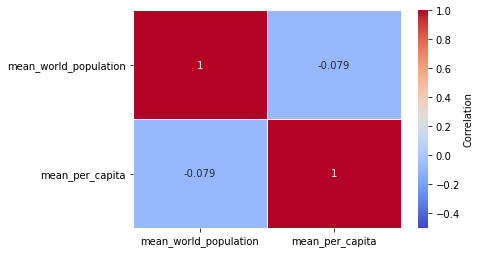

In [45]:
#plot the correlation between the mean per capita and mean world population
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', linewidth=1.0, 
                       cbar_kws={'label':'Correlation'},
             vmin=-0.5, vmax=1)       

The plot above shows that there is a negative correlation between the mean per capita and mean world population hence there is no correlation between both mean values.